#Problem 1

**Analyse customer behaviour to segment customers for targeted marketing**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = "/content/online_retail_II.xlsx"
df = pd.read_excel(path)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df_cleaned = df.dropna(subset=['Customer ID'])

In [ ]:
df_cleaned['Total Price'] = df_cleaned['Quantity'] * df_cleaned['Price']

<ipython-input-7-83d8b2fdd632>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Total Price'] = df_cleaned['Quantity'] * df_cleaned['Price']


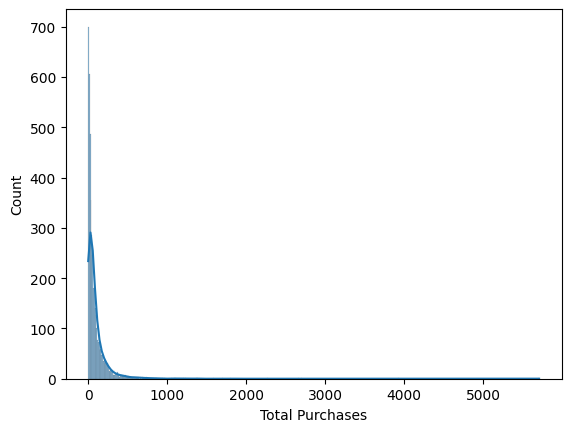

In [ ]:
customer_data = df_cleaned.groupby('Customer ID').agg({
    'Invoice': 'count',
    'Total Price': 'sum'
}).rename(columns={'Invoice': 'Total Purchases'})
sns.histplot(customer_data['Total Purchases'], kde=True)
plt.show()

In [ ]:
import datetime as dt
current_date = df_cleaned['InvoiceDate'].max() + dt.timedelta(days=1)
rfm = df_cleaned.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,
    'Invoice': 'count',
    'Total Price': 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'Invoice': 'Frequency', 'Total Price': 'Monetary'})
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

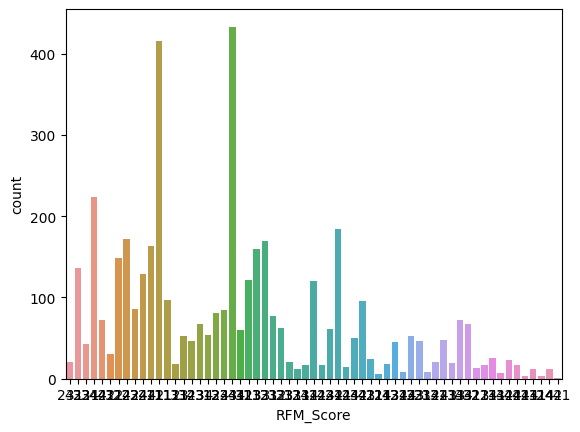

In [ ]:
sns.countplot(x='RFM_Score', data=rfm)
plt.show()

#Problem 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
file_path = '/content/processed.cleveland.data'
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
data = pd.read_csv(file_path, names=columns, na_values="?")
print(data.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  
0    3.0  0.0   6.0    0  
1    2.0  3.0   3.0    2  
2    2.0  2.0   7.0    1  
3    3.0  0.0   3.0    0  
4    1.0  0.0   3.0    0  


In [ ]:
data.fillna(data.median(), inplace=True)

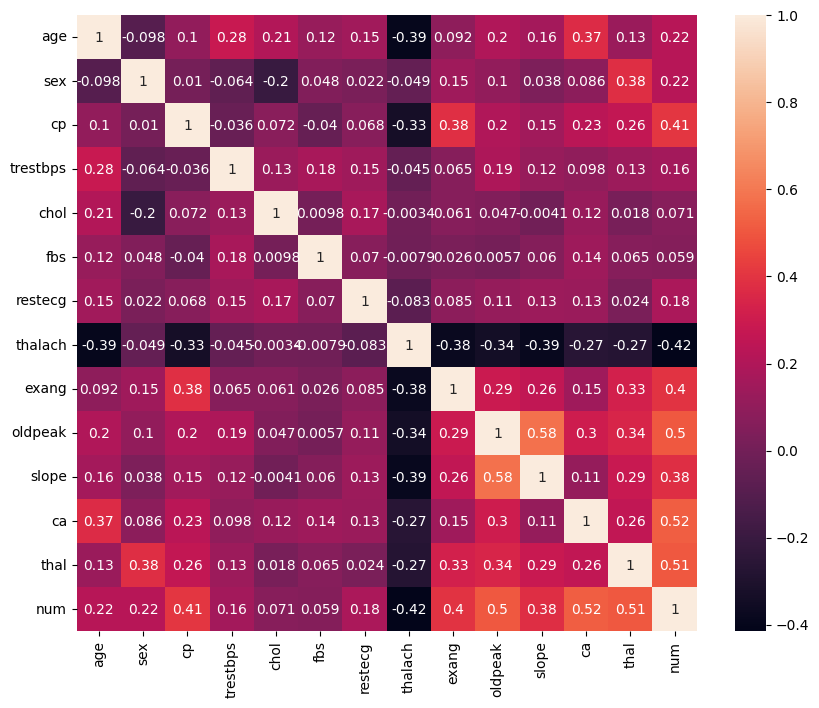

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
X = data.drop('num', axis=1)
y = (data['num'] > 0).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[31  4]
 [ 9 17]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        35
           1       0.81      0.65      0.72        26

    accuracy                           0.79        61
   macro avg       0.79      0.77      0.78        61
weighted avg       0.79      0.79      0.78        61

Accuracy: 0.7868852459016393


In [ ]:
print(model.coef_)

[[-0.19181685  0.29817155  0.59508967  0.53845448  0.36387059 -0.35079561
   0.17064304 -0.39448735  0.59444338  0.24781673  0.43335477  1.22046224
   0.81276638]]


#Problem 3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
file_path = '/content/Dataset.csv'
data = pd.read_csv(file_path)
print(data.head())

   user_id  item_id  rating  timestamp
0        0       50       5  881250949
1        0      172       5  881250949
2        0      133       1  881250949
3      196      242       3  881250949
4      186      302       3  891717742


In [ ]:
user_item_matrix = data.pivot_table(index='user_id', columns='item_id', values='rating')

In [ ]:
normalized_matrix = user_item_matrix.subtract(user_item_matrix.mean(axis=1), axis='rows')

In [ ]:
similarity_matrix = cosine_similarity(normalized_matrix.fillna(0))

In [ ]:
def recommend_movies(user_id, num_recommendations=5):
    user_similarity_scores = similarity_matrix[user_id]
    sorted_user_similarity_scores = np.argsort(user_similarity_scores)[::-1]
    recommended_movies = []
    for index in sorted_user_similarity_scores:
        if len(recommended_movies) < num_recommendations:
            recommended_movies.extend(user_item_matrix.columns[np.where(user_item_matrix.iloc[index].notna())])
        else:
            break
    return list(set(recommended_movies))[:num_recommendations]

user_id = 1
recommendations = recommend_movies(user_id)
print("Recommended Movies:")
print(recommendations)


Recommended Movies:
[1, 2, 3, 4, 5]


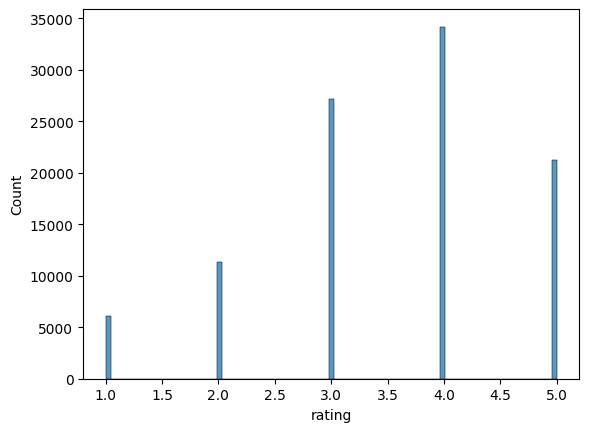

In [ ]:
sns.histplot(data['rating'])
plt.show()